# **SENTIMEN ANALISIS SHOPEE MENGGUNAKAN NAIVE BAYES**

In [144]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Instal pustaka Sastrawi untuk stemming dan penghapusan kata-kata stopword
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud



## IMPORT DATA

In [145]:
tweets = pd.read_csv('/content/df_busu6.csv')
tweets

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,98b2fcbb-de53-43b4-a05e-a3d8904798de,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"makin lelet aplikasinya, berat bgt rasanya. udah refresh beberapa kali, udh dihapus chahe, bahkan hapus data tetep aja lelet!!!!!!!! sering lag sama banyak bug nya juga! kadang pas buka aplikasinya layar semua putih, terus sering keluar dari aplikasinya. padahal buka aplikasi lain lancar2 aja, jaringan bagus memori jg ga penuh, tapi pas buka shopee malah lag, terus nge blank. 👎",2,7479,3.52.19,2025-06-29 10:49:41,NaN,NaN,3.52.19
1,06e54b55-6670-426c-a2f9-9c8c2d25c445,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"tolong perbaiki lagi dong.. setiap buka aplikasi shopee selalu muncul vidio duluan, yang membuat hp jadi berat dan panas.. padahal udah berbagai cara ngrestatd hp, bersehin cache, masih tetap ngelag setiap buka aplikasi shoope. padahal aku coba aplikasi lain yang berat berat masih aman aman aja.",5,771,3.52.19,2025-07-01 14:32:27,"Hai ka kzapy maaf ya buat kamu gak nyaman terkait kendalanya, aku saranin kakak bisa melakukan clear cache diaplikasi Shopee, coba logout lalu login kembali & bisa coba berkala. Apabila masih berkendala Mohon hubungi kami dengan memberikan screenshot review ini melalui DM ke Social Media kita @Shopee_id / @Shopeecare ya terimakasih ^SU",2025-07-01 15:27:27,3.52.19
2,30de5bb5-1f44-4a28-8325-14d6c7a2e608,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"YaAllah iklannyaaaaa, kenapa nggak bikin iklan yang lebih simpel dan singkat sih? memaksa itu tidak baik! apalagi sampai berlebih lebihan, untuk aplikasi dan seisinya Alhamdulillah sudah bagus, hanya ada sedikit yang perlu di perbaiki, sekali lagi, iklannya jangan terlalu berlebihan ya kak!!! hadehhh saya lagi ada tugas keganggu banget sama ini iklan, nggak semua orang harus belanja di aplikasi ini, oke, mohon di mengerti, Assalamualaikum.",2,48,3.52.19,2025-07-01 06:07:51,"Hai kak ila kheyr, mohon maaf ya kak atas ketidaknyamanannya terkait iklan Shopee. Aku infoin bahwa adanya iklan bertujuan agar pengguna mengetahui promo yang sedang berjalan di Shopee ya kak. Jika kakak ada kendala atau pertanyaan terkait shopee boleh infoin detail kendala melalui DM ke Sosmed @shopee_id/@Shopeecare ya. Sehat selalu ^NZ",2025-07-01 07:07:36,3.52.19
3,70e8a30c-0c6e-40ad-b393-e2452d4ed7e5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Tolong optimalisasi aplikasinya diperbaiki, padahal saya mau bayar SPlater tapi option menu nya ga muncul2 alias blank putih saja, sudah 2 hari seperti ini terus, selalu saja ada tulisan diatas seperti ""maaf sedang ada gangguan"" terus, tapi untuk aktivitas lain seperti pencaharian barang, payment dan lain2 itu lancar2 saja, tolong diperbaiki lagi",2,11,3.52.19,2025-07-02 04:40:56,"Hai kak Aditya Ramdhan, maaf banget ya udah buat ga nyaman. terkait kendala kakak, aku infoin kamu bisa chat aku dgn memberikan detail kendala, username dan SS kendala melalui DM ke Social Media IG kita @Shopee_id/@Shopeecare_id yaa. Stay safe ^KY",2025-07-02 05:27:37,3.52.19
4,b71bff2b-29b2-455f-8ea2-f261bfda013d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,apk ini ok bagus banyak banget apa aja ada kita cari tapi satu kendalanya LEMOT tolong di benahi lagi supaya tidak lemot dipencet kadang lama keluar nya atau gambarnya pokoknya lemot banget deh cuma ini yang bikin kurang nyaman. DIBENAHI LAGI....,3,13,3.52.19,2025-07-02 11:12:15,NaN,NaN,3.52.19
...,...,...,...,...,...,...,...,...,...,...,...
5995,0492a50c

In [146]:
df = tweets[['at', 'content']]
df

,at,content
0,2025-06-29 10:49:41,"makin lelet aplikasinya, berat bgt rasanya. udah refresh beberapa kali, udh dihapus chahe, bahkan hapus data tetep aja lelet!!!!!!!! sering lag sama banyak bug nya juga! kadang pas buka aplikasinya layar semua putih, terus sering keluar dari aplikasinya. padahal buka aplikasi lain lancar2 aja, jaringan bagus memori jg ga penuh, tapi pas buka shopee malah lag, terus nge blank. 👎"
1,2025-07-01 14:32:27,"tolong perbaiki lagi dong.. setiap buka aplikasi shopee selalu muncul vidio duluan, yang membuat hp jadi berat dan panas.. padahal udah berbagai cara ngrestatd hp, bersehin cache, masih tetap ngelag setiap buka aplikasi shoope. padahal aku coba aplikasi lain yang berat berat masih aman aman aja."
2,2025-07-01 06:07:51,"YaAllah iklannyaaaaa, kenapa nggak bikin iklan yang lebih simpel dan singkat sih? memaksa itu tidak baik! apalagi sampai berlebih lebihan, untuk aplikasi dan seisinya Alhamdulillah sudah bagus, hanya ada sedikit yang perlu di perbaiki, sekali lagi, iklannya jangan terlalu berlebihan ya kak!!! hadehhh saya lagi ada tugas keganggu banget sama ini iklan, nggak semua orang harus belanja di aplikasi ini, oke, mohon di mengerti, Assalamualaikum."
3,2025-07-02 04:40:56,"Tolong optimalisasi aplikasinya diperbaiki, padahal saya mau bayar SPlater tapi option menu nya ga muncul2 alias blank putih saja, sudah 2 hari seperti ini terus, selalu saja ada tulisan diatas seperti ""maaf sedang ada gangguan"" terus, tapi untuk aktivitas lain seperti pencaharian barang, payment dan lain2 itu lancar2 saja, tolong diperbaiki lagi"
4,2025-07-02 11:12:15,apk ini ok bagus banyak banget apa aja ada kita cari tapi satu kendalanya LEMOT tolong di benahi lagi supaya tidak lemot dipencet kadang lama keluar nya atau gambarnya pokoknya lemot banget deh cuma ini yang bikin kurang nyaman. DIBENAHI LAGI....
...,...,...
5995,2025-05-16 23:51:04,shopee skrg ngikutin lazada.. aku tidak klik iklan tp kok ngeklik sendiri.. maksa iklannya.. tolong donk pecat karyawan yg pasang bot autoclick
5996,2025-04-17 09:15:43,"sangat nyaman belanja di shoope apa yg kita butuhkan selalu ada dan tersedia. tinggal pencet hp barang sampai rumah, so effortless"
5997,2025-04-28 13:46:28,"Shopee sekarang ngeselin, niat mau belanja malah langsung masuk ke Shopee video, harusnya itu fitur yang sifatnya opsional mau kita pakai atau ngga, malah jadi pemaksaan. Tolong yang tau cara supaya pas buka shopee ngga diarahin ke Shope Video/Live. Bikin males belanja."
5998,2025-05-07 09:37:43,barang bagus2 kita tinggal milih toko nya yg kita percaya bisa tanya2 di leve ad juga toko jual gak sesuai di vidionya pokok nya pintar 2 kita lah


Fungsi Prerpocessing

In [147]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

###COBA MELAKUKAN PREPROCESSING

In [148]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the missing resource

slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "hubla": "perhubungan laut", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

coba = 'hai kak Maura maaf ya atas kendala yg kamu alami. Aku saranin km bisa menggunakan jaringan yg stabil, melakukan Clear Cache, Log out dan Log in kembali secara berkala dalam waktu 1x24 jam ya. Kalo ada kendala bisa hubungi aku dg memberikan screenshot review ini ke DM Social Media kita @Shopee_id / @Shopeecare ya, Sehat selalu ^JY'
print('Asli : ', coba)

coba = cleaningText(coba)
print('cleaningText : ', coba)
coba = casefoldingText(coba)
print('casefoldingText :', coba)
coba = fix_slangwords(coba)
print('fix_slangwords :', coba)
coba = stemmingText(coba)
print('stemmingText : ', coba)
coba = tokenizingText(coba)
print('tokenizingText : ',coba)
coba = filteringText(coba)
print('filteringText : ',coba)
coba = toSentence(coba)
print('toSentence : ', coba)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Asli :  hai kak Maura maaf ya atas kendala yg kamu alami. Aku saranin km bisa menggunakan jaringan yg stabil, melakukan Clear Cache, Log out dan Log in kembali secara berkala dalam waktu 1x24 jam ya. Kalo ada kendala bisa hubungi aku dg memberikan screenshot review ini ke DM Social Media kita @Shopee_id / @Shopeecare ya, Sehat selalu ^JY
cleaningText :  hai kak Maura maaf ya atas kendala yg kamu alami Aku saranin km bisa menggunakan jaringan yg stabil melakukan Clear Cache Log out dan Log in kembali secara berkala dalam waktu x jam ya Kalo ada kendala bisa hubungi aku dg memberikan screenshot review ini ke DM Social Media kita id   ya Sehat selalu JY
casefoldingText : hai kak maura maaf ya atas kendala yg kamu alami aku saranin km bisa menggunakan jaringan yg stabil melakukan clear cache log out dan log in kembali secara berkala dalam waktu x jam ya kalo ada kendala bisa hubungi aku dg memberikan screenshot review ini ke dm social media kita id   ya sehat selalu jy
fix_slangwords : hai

## Mengaplikasikan Fungsi preprocessing

In [149]:
df['text_clean'] = df.iloc[:,1].apply(cleaningText)
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)
df['text_akhir'] = df['text_stopword'].apply(toSentence)

df

/tmp/ipython-input-149-4152895870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_clean'] = df.iloc[:,1].apply(cleaningText)
/tmp/ipython-input-149-4152895870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)
/tmp/ipython-input-149-4152895870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,at,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,2025-06-29 10:49:41,"makin lelet aplikasinya, berat bgt rasanya. udah refresh beberapa kali, udh dihapus chahe, bahkan hapus data tetep aja lelet!!!!!!!! sering lag sama banyak bug nya juga! kadang pas buka aplikasinya layar semua putih, terus sering keluar dari aplikasinya. padahal buka aplikasi lain lancar2 aja, jaringan bagus memori jg ga penuh, tapi pas buka shopee malah lag, terus nge blank. 👎",makin lelet aplikasinya berat bgt rasanya udah refresh beberapa kali udh dihapus chahe bahkan hapus data tetep aja lelet sering lag sama banyak bug nya juga kadang pas buka aplikasinya layar semua putih terus sering keluar dari aplikasinya padahal buka aplikasi lain lancar aja jaringan bagus memori jg ga penuh tapi pas buka shopee malah lag terus nge blank,makin lelet aplikasinya berat bgt rasanya udah refresh beberapa kali udh dihapus chahe bahkan hapus data tetep aja lelet sering lag sama banyak bug nya juga kadang pas buka aplikasinya layar semua putih terus sering keluar dari aplikasinya padahal buka aplikasi lain lancar aja jaringan bagus memori jg ga penuh tapi pas buka shopee malah lag terus nge blank,makin lambat aplikasinya berat banget rasanya udah refresh beberapa kali udh dihapus chahe bahkan hapus data tetep aja lambat sering lag sama banyak bug nya juga kadang pas buka aplikasinya layar semua putih terus sering keluar dari aplikasinya padahal buka aplikasi lain lancar aja jaringan bagus memori jg ga penuh tapi pas buka shopee malah lag terus nge blank,"[makin, lambat, aplikasinya, berat, banget, rasanya, udah, refresh, beberapa, kali, udh, dihapus, chahe, bahkan, hapus, data, tetep, aja, lambat, sering, lag, sama, banyak, bug, nya, juga, kadang, pas, buka, aplikasinya, layar, semua, putih, terus, sering, keluar, dari, aplikasinya, padahal, buka, aplikasi, lain, lancar, aja, jaringan, bagus, memori, jg, ga, penuh, tapi, pas, buka, shopee, malah, lag, terus, nge, blank]","[lambat, aplikasinya, berat, banget, udah, refresh, kali, udh, dihapus, chahe, hapus, data, tetep, aja, lambat, lag, bug, kadang, pas, buka, aplikasinya, layar, putih, aplikasinya, buka, aplikasi, lancar, aja, jaringan, bagus, memori, jg, penuh, pas, buka, shopee, lag, nge, blank]",lambat aplikasinya berat banget udah refresh kali udh dihapus chahe hapus data tetep aja lambat lag bug kadang pas buka aplikasinya layar putih aplikasinya buka aplikasi lancar aja jaringan bagus memori jg penuh pas buka shopee lag nge blank
1,2025-07-01 14:32:27,"tolong perbaiki lagi dong.. setiap buka aplikasi shopee selalu muncul vidio duluan, yang membuat hp jadi berat dan panas.. padahal udah berbagai cara ngrestatd hp, bersehin cache, masih tetap ngelag setiap buka aplikasi shoope. padahal aku coba aplikasi lain yang berat berat masih aman aman aja.",tolong perbaiki lagi dong setiap buka aplikasi shopee selalu muncul vidio duluan yang membuat hp jadi berat dan panas padahal udah berbagai cara ngrestatd hp bersehin cache masih tetap ngelag setiap buka aplikasi shoope padahal aku coba aplikasi lain yang berat berat masih aman aman aja,tolong perbaiki lagi dong setiap buka aplikasi shopee selalu muncul vidio duluan yang membuat hp jadi berat dan panas padahal udah berbagai cara ngrestatd hp bersehin cache masih tetap ngelag setiap buka aplikasi shoope padahal aku coba aplikasi lain yang berat berat masih aman aman aja,tolong perbaiki lagi dong setiap buka aplikasi shopee selalu muncul vidio duluan yang membuat hp jadi berat dan panas padahal udah berbagai cara ngrestatd hp bersehin cache masih tetap ngelag setiap buka aplikasi shoope padahal aku coba aplikasi lain yang berat berat masih aman aman aja,"[tolong, perbaiki, lagi, dong, setiap, buka, aplikasi, shopee, selalu, muncul, vidio, duluan, yang, membuat, hp, jadi, berat, dan, panas, padahal, udah, berbagai, cara, ngrestatd, hp, bersehin, cache, masih, tetap, ngelag, setiap, buka, aplikasi, shoope, padahal, aku, c

In [150]:
df.to_csv("preprocessing_data.csv", index = False)  #kemudian save menjadi file csv

##LABEL DENGAN LEXICON

In [151]:
# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score >= 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    # else:
    #     polarity = 'neutral'
    return score, polarity

In [152]:
results = df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
positive    3058
negative    2942
Name: count, dtype: int64


/tmp/ipython-input-152-222789242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity_score'] = results[0]
/tmp/ipython-input-152-222789242.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'] = results[1]


In [153]:
tweets = df

###VISUALISASI LABELING

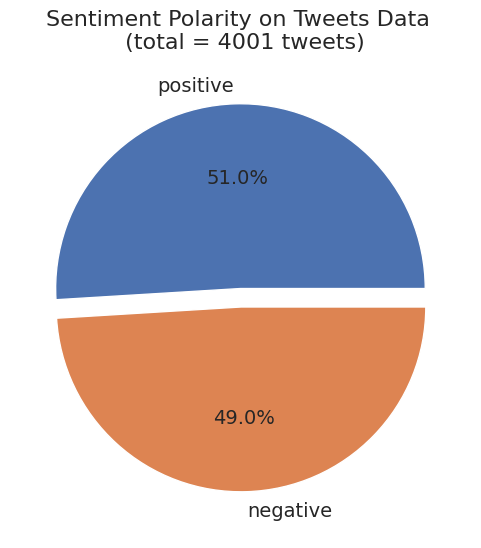

In [154]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in tweets['polarity'].value_counts()]
labels = list(tweets['polarity'].value_counts().index)
explode = (0.1, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data \n (total = 4001 tweets)', fontsize = 16, pad = 20)
plt.show()

###Polaritas positif dan negatif

In [155]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,text_akhir,polarity_score,polarity
1,lemotttmengenai harga lihat produk tertera harga sekian saldo shopeepay mencukupi diisi diisi saldo shopeepay lihat harga produk dibeli harganya menyenangkan harganya diisi saldo produk gambar pendukung produk purnografi produk pemutih badan penanganannya terimakasih,39,positive
2,shoppe belanja online yg bagus amanah tdk sesuai pesanan admin shope dana pokonya bets mantap kebijakan pembeli komplain langsung dana kembalikan yg pnting antr paket pengembalian jasa kirim semoga kebijakan ny kayak gitu hnya shoppe bareng sesuaigak berfungsi bareng ajukan pengembalian mudah,37,positive
3,kolom ulasan shopee terbaru ulasan performa sellertoko penilaian kualitas barang kecepatan jasa kirim sikap kurir dirasa sikap seller memuaskan buyer nilai kolom tersendiri kolom kualitas barang,37,positive
4,userfriendly mudah aplikasi situs shopee ramah pengguna antarmuka mudah dipahami pemula fitur pencarian filter membantu pengguna menemukan produk gratis ongkir voucher promo gratis ongkir minimum belanja tersedia voucher cashback diskon toko promo harian fitur shopeepay paylater sistem pembayaran shopeepay mempercepat transaksi shopee paylater,36,positive
5,tolong jasa kirim anteraja hapus aja paketnya dateng kendala melulu make jasa kirim anteraja fitur blacklist jasa kirim otomatis make jasa kirim shopee kali anteraja paket lamaa dateng kendala tau jasa kirim anteraja mending nyari toko make jasa kirim anteraja,36,positive
6,puas belanja shopee berlangganan shopee terkadang seller amanah seller amanah terimakasih seller amanah semoga berkah shopee dibeli mudah,34,positive
7,shopee platform ecommerce populer menawarkan keuntungan penggunanya harga kompetitif shopee seringkali menawarkan harga produk kompetitif diskon menarik produk beragam platform menyediakan produk elektronik fashion kemudahan berbelanja shopee memiliki antarmuka userfriendly membuatnya mudah mencari membeli produk gratis ongkir shopee,34,positive
8,aplikasi belanja terbaik terpercaya shopee membantu belanja online pilihan produk harga terjangkau promo menarik fitur gratis ongkir memudahkan tampilan aplikasinya userfriendly mudah pemula proses pembayaran aman pilihan ekspedisi lengkap fitur chat penjual membantu kecewa terima kasih shopee,34,positive
9,andai shopee membangun toko ofline namanya shopeemart shopeemart sukses dikelola memenuhi kebutuhan pelanggan kombinasi toko online offline shopee pengalaman berbelanja lengkap memuaskan pelanggan shopeemart peluang shopee meningkatkan interaksi pelanggan memahami kebutuhan layanan personal pelanggan penjualan cpt meningkat,34,positive
10,alhamdulillah pengalaman return kali shopee mudah amanah banget terimakasih banget membantu konsumen mengembalikan barang yg penjual berbelanja alhamdulillah memuaskan pesan apapun shopee smg kedepannya shopee mempertahankan menyediakan toko yg amanah yah,33,positive


In [156]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = tweets[tweets['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=True)[0:10].reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:20]

,text_akhir,polarity_score,polarity
1,apk buruk membatalkan pesanan sistem gini oknum yg cari kesempatan sengaja menolak pembatalan salah alamat pesanan batal kanhubungi cs bergunatidak solusi alasan shopee membatalkan sepihakkembalikan sistem yg biasanyabisa membatalkan pesanan salah alamat sengaja kasi bintang biar baca shopee perbaiki sistem buruk kelen tu,-49,negative
2,kekurangan aplikasi klo bayar shoppe latter sistem bayar ambil bayar metode aplikasi sebelah tenornya sebulan cicil peting sebulan jatuh temponya segitu seumpama sebulan tagihan juta apilkasi sebelah cicil ratus ratus sebulan sejuta ketutup aplikasi yg namanya menu gitu,-46,negative
3,aplilaksi online buruk pengiriman berdasarkan pengalaman pesan keratom obat anti nyeri saraf kejepitsaya pesanan terlambat membutuhkan obat tersebutstock habisakhir say tersiksa menahan nyeri pesan online sebelah alhamdulillah pengiriman cepat sampaibuat pihat terkait tolong perhatianya orang pesan barang maslah,-46,negative
4,pengiriman barang gagal barang dikirim pembelipembeli korban sistem bayar ditempat dinonaktifkan klu kali pengiriman gagalsedangkan kesalahan pembeliini sdh yg sistem bayar ditempat dinonaktifkan gara pengiriman gagal,-46,negative
5,spx jelek pengiriman lambat tonjok kurirnya paketnya dateng jorok banget pengiriman semenjak pengiriman diganti pake spx kaya pake jtje lain-lain pake spx udah jorok pengiriman udah dikirim kurir sampe reccomended banget belanja shopee bikin males aja shopee aplikasi belanja online bagus smenjak spx terjelek,-44,negative
6,bayar ditempat gara gara barng batal membatalkan teruntuk daerah kaltim tolong kurirpengiriman spx semenjak pengiriman spx daerah barang tau tau barng kembalikan membatalkan pesanan tolong kembalikan sistem bayar ditempat akun kesalahan sistem pengiriman spx yg sesuai,-43,negative
7,kurirnya spx parah ngerjain pembeli dikirim jam nggak pokoknya jelek kurirnya kecewa nggak sebelah kurir mengecewakan banget kurirnya atitudenya jelek bagusan jnt lexid kayak ngerasa kapok belanja dishoppe kayaknya pindah si tiktok lazada kurir spx berulah,-42,negative
8,tim shoopepaylater buruk kontak pakai orang kenal kontak darurat telepon konfirmasi persetujuan langsung masukan kontak darurat si peminjam langsung cair si peminjam bayar kontaknya aktif suruh nagih mengenalnya teror telepon tim penagihan shoopepaylater tim penagih alamat peminjam kontak darurat teror,-40,negative
9,sangatt membantu gampang oprasikan saran permudah bikin akun paylater daftar gagal udh kali coba nama ojk tpi gagal daftarin orang tua gagal data isi yg salah trus nama ojk tpi gagal melulu tolong permudah daftar spay later apah adain fitur daftar susahgagal melulu,-40,negative
10,jumblah limit kredit paylater menurun tiba² bayar tanggal jatuh tempo tanggal jatuh tempo tanggal tpi bayar pas gajian tanggal jd tanggal jatuh tempo,-39,negative


###VISUALISASI WORDCLOUD

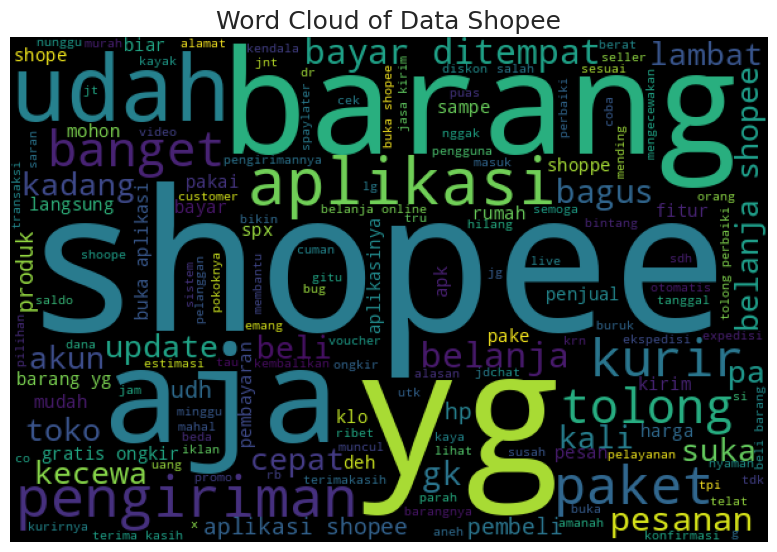

In [157]:
# Visualize word cloud

list_words=''
for tweet in tweets['text_stopword']:
    for word in tweet:
        list_words += ' '+(word)

wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Data Shopee', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

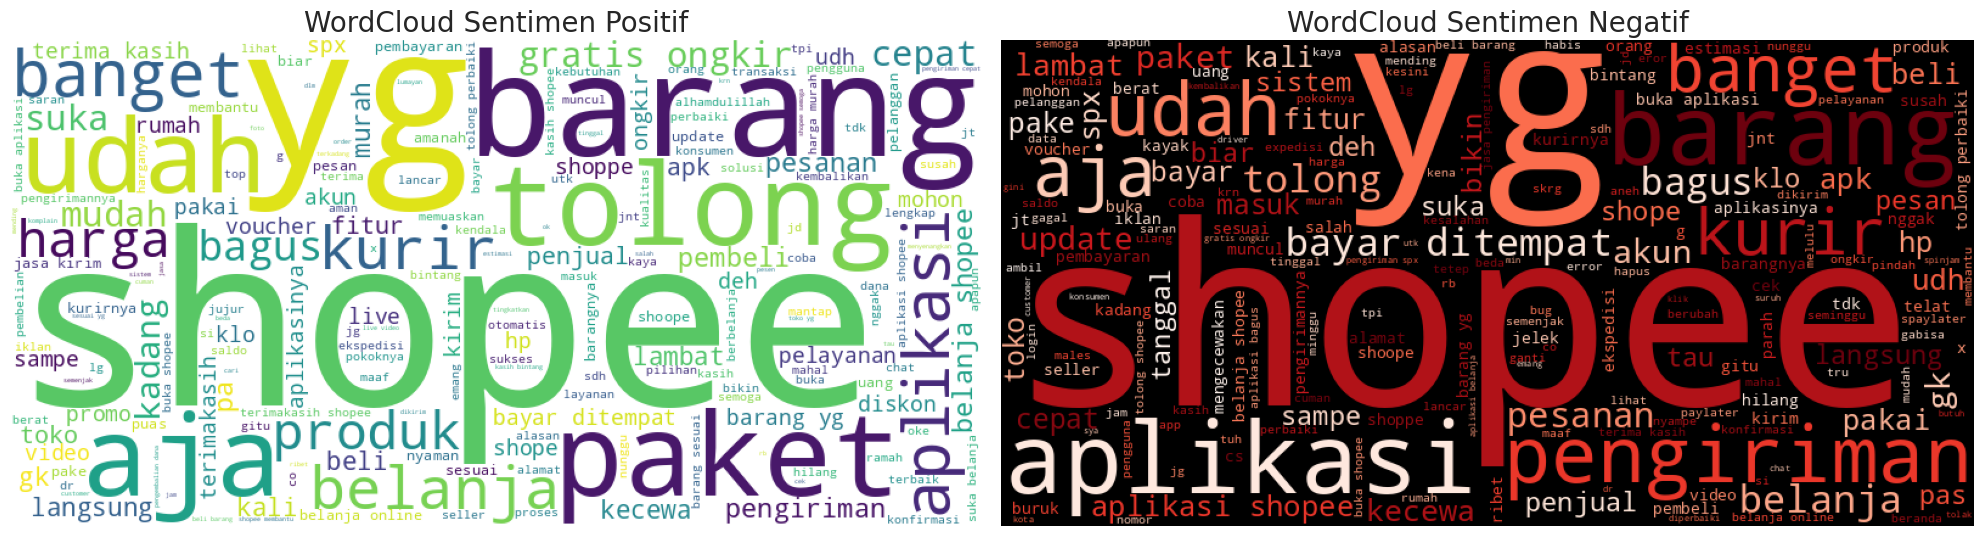

In [182]:
# Misal kita punya dua DataFrame: df_pos dan df_neg
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Contoh split manual (ini asumsi, sesuaikan kalau ada label)
df_pos = tweets[tweets['polarity'] == 'positive']
df_neg = tweets[tweets['polarity'] == 'negative']

# Gabungkan teks
text_pos = " ".join(df_pos['text_akhir'].dropna().astype(str))
text_neg = " ".join(df_neg['text_akhir'].dropna().astype(str))

# Buat wordcloud
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].imshow(WordCloud(width=800, height=400, background_color='white').generate(text_pos))
axs[0].set_title("WordCloud Sentimen Positif", fontsize=20)
axs[0].axis('off')

axs[1].imshow(WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(text_neg))
axs[1].set_title("WordCloud Sentimen Negatif", fontsize=20)
axs[1].axis('off')

plt.tight_layout()
plt.show()

### VISUALISASI DISTRIBUSI KATA DAN KALIMAT

In [158]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

Missing values:
 at                      0
content                 0
text_clean              0
text_casefoldingText    0
text_slangwords         0
text_tokenizingText     0
text_stopword           0
text_akhir              0
polarity_score          0
polarity                0
dtype: int64


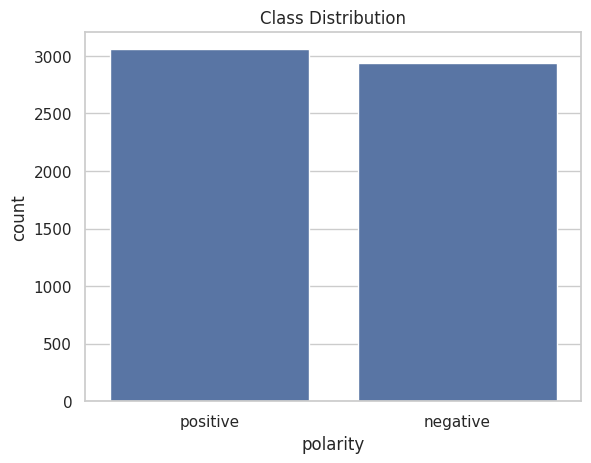

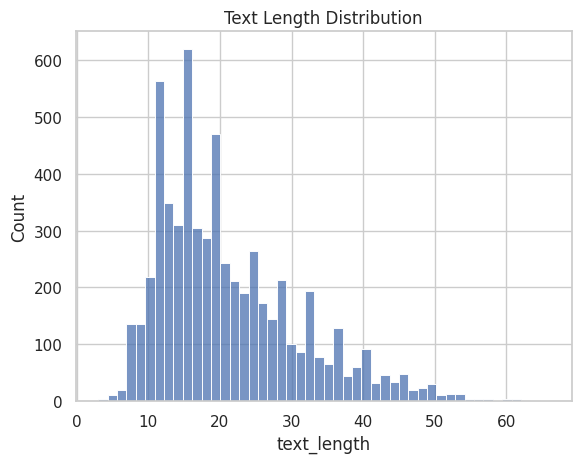

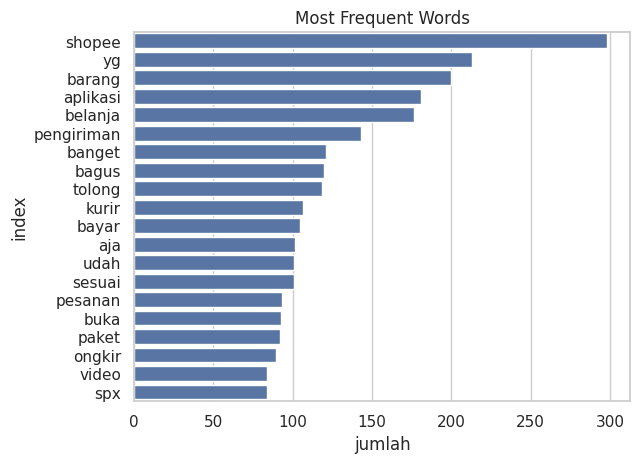

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt


# Check for missing values
print('Missing values:\n', tweets.isnull().sum())

# Check class distribution
sns.countplot(x='polarity', data=tweets)
plt.title('Class Distribution')
plt.show()

# Visualize text length distribution
tweets['text_length'] = tweets['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(tweets['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tweets['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

## PROSES KLASIFIKASI

In [160]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = tweets['text_akhir']
y = tweets['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,aja,akun,alamat,alasan,aman,amanah,aneh,apapun,apk,aplikasi,...,trus,uang,udah,udh,ulang,update,utk,video,voucher,yg
0,0.236864,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.097326,...,0.0,0.0,0.122740,0.16675,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.130406,0.0,0.0,0.0,0.426078,0.0,0.0,0.0,0.000000,0.321498,...,0.0,0.0,0.135149,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.282675,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.172923,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.220673,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.276010
5996,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.205656
5997,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.245329,0.0,0.000000
5998,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.217593


### DATA SPLITT

In [161]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

### DATA TRAINING

In [162]:
# Latih model klasifikasi Naive Bayes
from sklearn.naive_bayes import GaussianNB

naive_bayes = BernoulliNB()
naive_bayes.fit(X_train.toarray(), y_train)

BernoulliNB()

### DATA TESTING

In [163]:
# Prediksi sentimen pada data uji
y_pred_train = naive_bayes.predict(X_train.toarray())
y_pred_test = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model
accuracy_train = accuracy_score(y_pred_train, y_train)
accuracy_test = accuracy_score(y_pred_test, y_test)
print('accuracy_train:', accuracy_train)
print('accuracy_test:', accuracy_test)

accuracy_train: 0.73625
accuracy_test: 0.7375


### EVALUASI

In [164]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluasi dengan classification report
classification = classification_report(y_test, y_pred_test)
print('Classification Report:')
print(classification)

Classification Report:
              precision    recall  f1-score   support

    negative       0.70      0.79      0.74       571
    positive       0.79      0.69      0.73       629

    accuracy                           0.74      1200
   macro avg       0.74      0.74      0.74      1200
weighted avg       0.74      0.74      0.74      1200



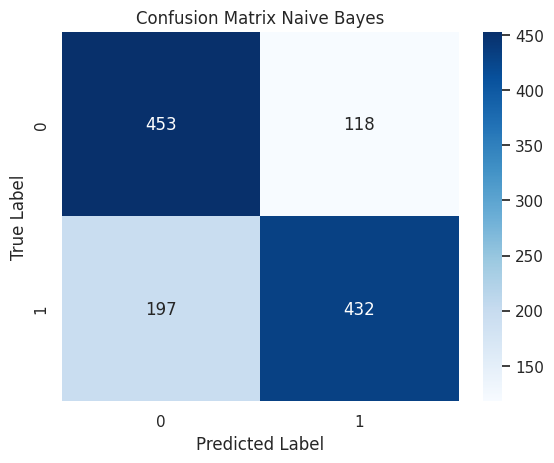

In [165]:
# membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# menampilkan confusion matrix menggunakan heatmap
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [167]:
x_test_ = tfidf.inverse_transform(X_test)

df = pd.DataFrame({
    'Data Test': x_test_,
    'True Label': y_test,
    'Hasil Prediksi': y_pred_test
})

df

,Data Test,True Label,Hasil Prediksi
1782,"[udah, kali, belanja, paket, kurir, kendala, ongkir, harga, kecewa, uang]",positive,positive
3917,"[aja, jg, spx, suka, alasan, pengirimannya, kurirnya]",positive,negative
221,"[kali, shopee, tolong, mohon, barang, yg, cek, klo, akun, bintang]",negative,negative
2135,"[banget, jg, shopee, aman, bikin, belanja, deh, nyaman, voucher, diskon]",positive,positive
5224,"[kendala, produk, toko]",positive,positive
...,...,...,...
2543,"[aplikasi, shopee, hp, coba, pindah, masuk, ribet]",negative,negative
1773,"[lambat, aplikasinya, banget, kadang, aplikasi, bagus, shopee, bayar, barang, yg, pengiriman, ditempat, pengguna, klo, pakai, barangnya, pesan]",negative,negative
2846,"[shopee, si, toko, kecewa, terimakasih]",positive,positive
5799,"[hp, yg, pembeli, parah, online]",negative,negative


In [169]:
# Menghitung TP, TN, FP, FN
TP = ((df['True Label'] == 'positive') & (df['Hasil Prediksi'] == 'positive')).sum()
TN = ((df['True Label'] == 'negative') & (df['Hasil Prediksi'] == 'negative')).sum()
FP = ((df['True Label'] == 'positive') & (df['Hasil Prediksi'] == 'negative')).sum()
FN = ((df['True Label'] == 'negative') & (df['Hasil Prediksi'] == 'positive')).sum()
print('true positive =', TP)
print('true negative =', TN)
print('False positive =', FP)
print('False negative =', FN)

true positive = 432
true negative = 453
False positive = 197
False negative = 118


In [171]:
# Menghitung jumlah positif dan negatif
asli_positif = ((df['True Label'] == 'positive')).sum()
asli_negatif = ((df['True Label'] == 'negative')).sum()
pred_positif = ((df['Hasil Prediksi'] == 'positive')).sum()
pred_negatif = ((df['Hasil Prediksi'] == 'negative')).sum()

print('asli_positif =', asli_positif)
print('asli_negatif =', asli_negatif)
print('pred_positif =', pred_positif)
print('pred_negatif =', pred_negatif)

asli_positif = 629
asli_negatif = 571
pred_positif = 550
pred_negatif = 650


### memasukkan text

In [172]:
def preprocessing_lengkap(text):
  text = cleaningText(text)
  text = casefoldingText(text)
  text = fix_slangwords(text)
  text = tokenizingText(text)
  text = filteringText(text)
  text = toSentence(text)
  return text

In [176]:
text = input("masukan contoh ulasan shopee : ")
text_preprocessing = preprocessing_lengkap(text)
text_tfidf = tfidf.transform([text_preprocessing])
text_predict = naive_bayes.predict(text_tfidf.toarray())
print("Sentimen: ", text_predict[0])

masukan contoh ulasan shopee : sangat membantu untuk berbelanja tanpa keluar rumah, cuman saja jasa kirim yg digunakan sangat membuat tidak nyaman untuk belanja. terutama jasa kirim SPX, sering terjadi keterlambatan pengantaran barang, bahkan paket sering dibatalkan sepihak oleh kurir SPX
Sentimen:  positive
